In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')



In [5]:
df=pd.read_csv('Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
139,140,Female,35,74,72
18,19,Male,52,23,29
95,96,Male,24,60,52
92,93,Male,48,60,49
11,12,Female,35,19,99


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.shape

(200, 5)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.CustomerID.nunique()

200

Text(0.5, 1.0, 'Histogram For Age')

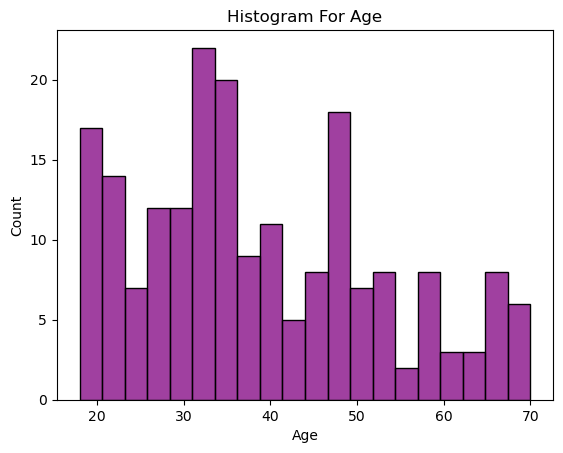

In [14]:
sns.histplot(data=df,x='Age',color='purple',bins=20)
plt.title('Histogram For Age')

<Axes: xlabel='Annual Income (k$)'>

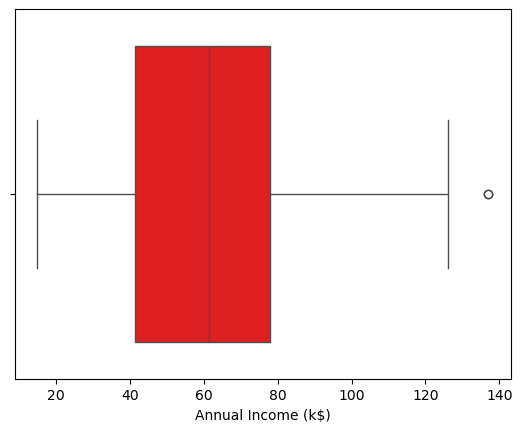

In [15]:
sns.boxplot(data=df,x='Annual Income (k$)',color='red')

In [16]:
df[df['Annual Income (k$)']>130]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [17]:
df.drop([198,199],inplace=True)

<Axes: xlabel='Annual Income (k$)'>

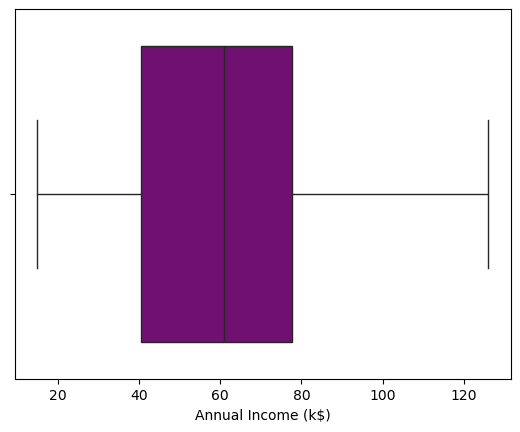

In [18]:
#After Removing The Outlier
sns.boxplot(data=df,x='Annual Income (k$)',color='purple')

In [19]:
df.drop('CustomerID',axis=1,inplace=True)

In [20]:
df.shape

(198, 4)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  198 non-null    object
 1   Age                     198 non-null    int64 
 2   Annual Income (k$)      198 non-null    int64 
 3   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

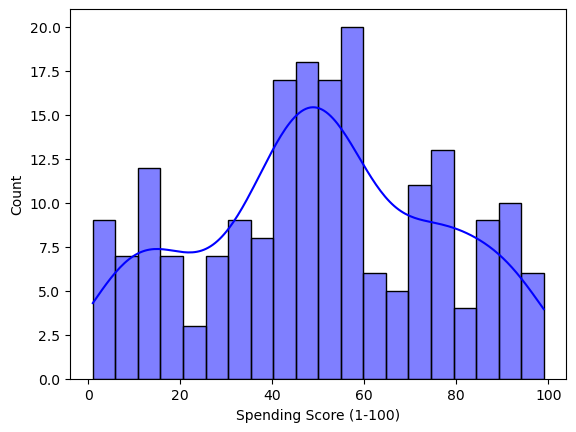

In [22]:
sns.histplot(data=df,x='Spending Score (1-100)',color='blue',bins=20,kde=True)

In [23]:
df['Gender'].value_counts()

Female    112
Male       86
Name: Gender, dtype: int64

In [24]:
df['Age'].describe()

count    198.000000
mean      38.929293
std       14.016852
min       18.000000
25%       28.250000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [25]:
df['Annual Income (k$)'].describe()

count    198.000000
mean      59.787879
std       25.237259
min       15.000000
25%       40.500000
50%       61.000000
75%       77.750000
max      126.000000
Name: Annual Income (k$), dtype: float64

In [26]:
df['Spending Score (1-100)'].describe()

count    198.000000
mean      50.196970
std       25.746846
min        1.000000
25%       35.000000
50%       50.000000
75%       72.750000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [27]:
df.groupby('Gender')[['Age']].mean()

,Age
Gender,
Female,38.098214
Male,40.011628


In [28]:
df.groupby('Gender')[['Annual Income (k$)']].mean()

,Annual Income (k$)
Gender,
Female,59.250000
Male,60.488372


In [29]:
df.groupby('Gender')[['Spending Score (1-100)']].mean()

,Spending Score (1-100)
Gender,
Female,51.526786
Male,48.465116


In [30]:
df.groupby('Gender')[['Age','Annual Income (k$)']].mean()

,Age,Annual Income (k$)
Gender,,
Female,38.098214,59.250000
Male,40.011628,60.488372


In [31]:
df.groupby('Gender')[['Age','Spending Score (1-100)']].mean()

,Age,Spending Score (1-100)
Gender,,
Female,38.098214,51.526786
Male,40.011628,48.465116


In [32]:
df.groupby('Gender')[['Annual Income (k$)','Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Gender,,
Female,59.250000,51.526786
Male,60.488372,48.465116


Text(0.5, 1.0, 'Gender Percentage ')

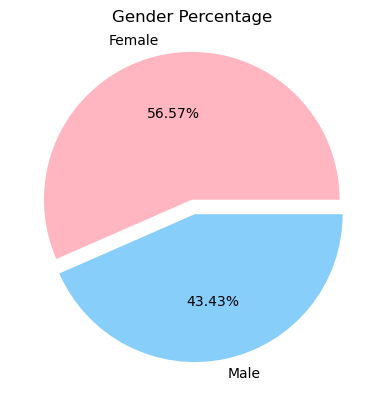

In [33]:
colors = ['lightpink','lightskyblue']
plt.pie(df['Gender'].value_counts(),autopct='%0.2f%%',colors=colors,labels=['Female','Male'],radius=1,explode=[0.1,0])
plt.title('Gender Percentage ')

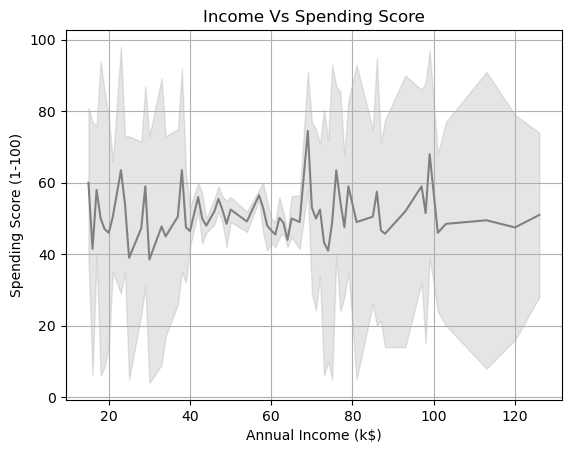

In [34]:
sns.lineplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',color='grey')
plt.title('Income Vs Spending Score')
plt.grid()

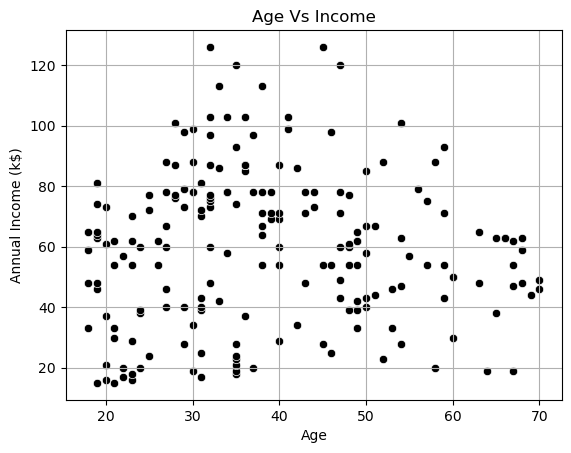

In [35]:
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)',color='black')
plt.title('Age Vs Income')
plt.grid()

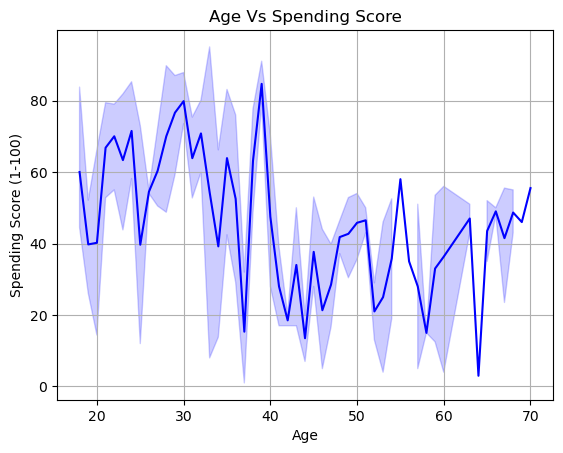

In [36]:
sns.lineplot(data=df,x='Age',y='Spending Score (1-100)',color='blue')
plt.title('Age Vs Spending Score')
plt.grid()

Text(0.5, 1.0, 'Gender VS Age')

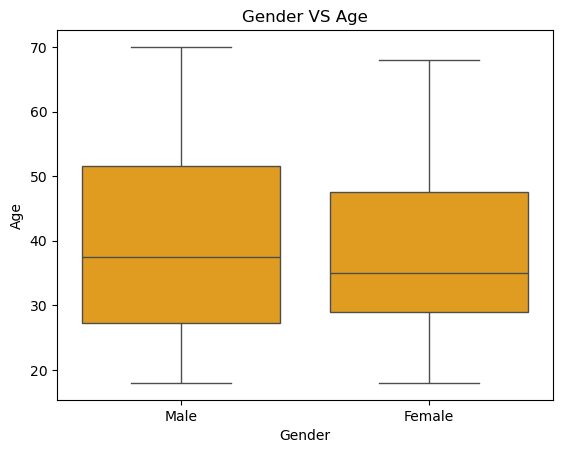

In [37]:
sns.boxplot(data=df,x='Gender',y="Age",color='orange')
plt.title('Gender VS Age')

Text(0.5, 1.0, 'Gender Vs Annual Income')

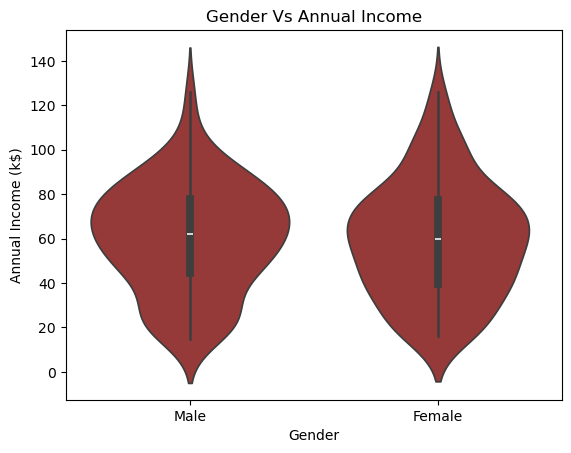

In [38]:
sns.violinplot(data=df,x='Gender',y='Annual Income (k$)',color='brown')
plt.title('Gender Vs Annual Income')

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

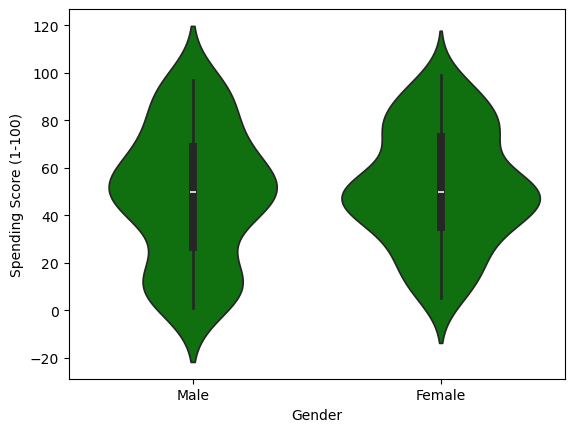

In [39]:
sns.violinplot(data=df,x='Gender',y='Spending Score (1-100)',color='green')

Text(0.5, 1.0, 'Heatmap For Numeric Columns')

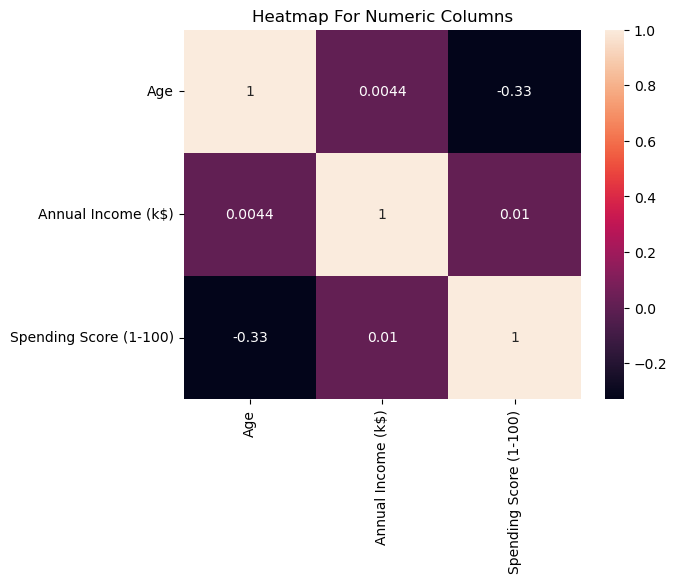

In [40]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Heatmap For Numeric Columns')

In [41]:
encoded=pd.get_dummies(df['Gender'],prefix='Gender').astype(int)
final=pd.concat([df,encoded],axis=1)
final.drop('Gender',axis=1,inplace=True)


In [42]:
final

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
193,38,113,91,1,0
194,47,120,16,1,0
195,35,120,79,1,0
196,45,126,28,1,0


In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [44]:
Scale=MinMaxScaler()
Scaled=Scale.fit_transform(final)
df_new=pd.DataFrame(Scaled,columns=final.columns)

In [45]:
x=df_new[['Spending Score (1-100)','Annual Income (k$)']]

In [46]:
sse=[]
for i in range (1,20):
    km=KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Plot For No Of Clusters')

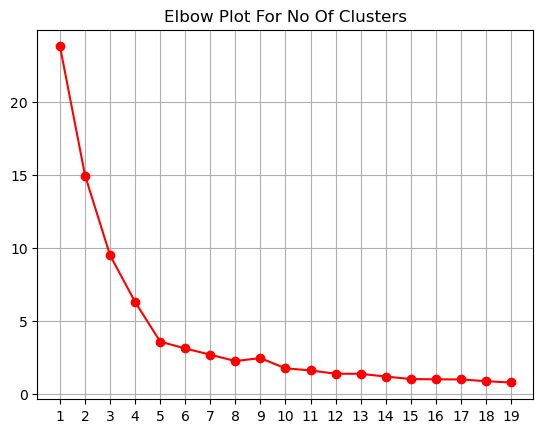

In [47]:
plt.plot(range(1,20),sse,color='red',marker='o')
plt.grid()
plt.xticks(range(1,20))
plt.title('Elbow Plot For No Of Clusters')


In [48]:
model=KMeans(n_clusters=5)
y_pred=model.fit_predict(x)
y_pred

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0])

In [49]:
df_new['Clusters']=y_pred

In [50]:
df_new

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Clusters
0,0.019231,0.000000,0.387755,0.0,1.0,3
1,0.057692,0.000000,0.816327,0.0,1.0,1
2,0.038462,0.009009,0.051020,1.0,0.0,3
3,0.096154,0.009009,0.775510,1.0,0.0,1
4,0.250000,0.018018,0.397959,1.0,0.0,3
...,...,...,...,...,...,...
193,0.384615,0.882883,0.918367,1.0,0.0,0
194,0.557692,0.945946,0.153061,1.0,0.0,4
195,0.326923,0.945946,0.795918,1.0,0.0,0
196,0.519231,1.000000,0.275510,1.0,0.0,4


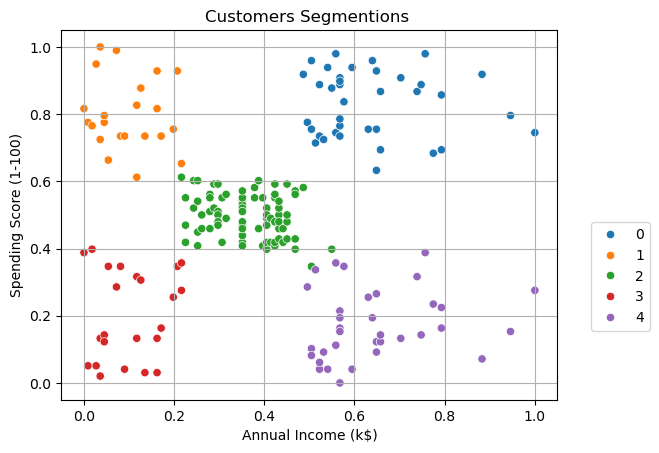

In [51]:
sns.scatterplot(data=df_new,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Clusters',palette='tab10')
plt.grid()
plt.title('Customers Segmentions ')
plt.legend(bbox_to_anchor=(1.2,0.5))

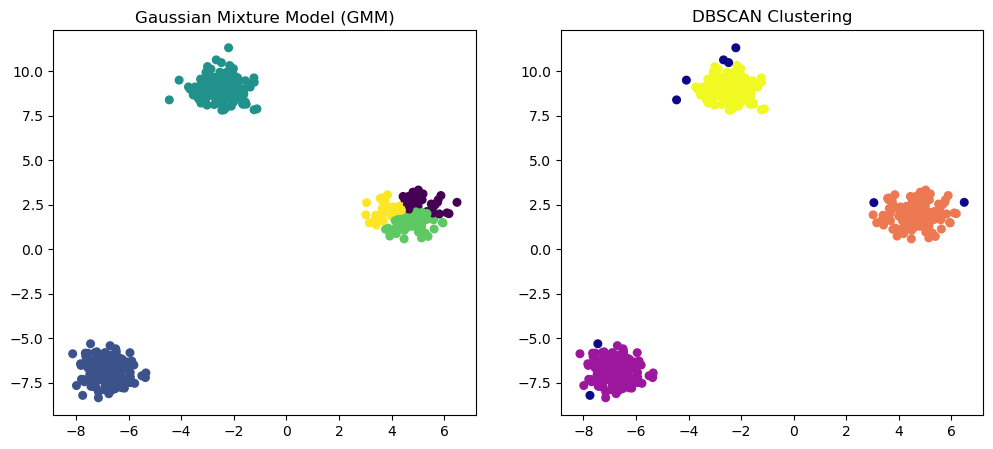

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=42)

gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap="viridis", s=30)
axes[0].set_title("Gaussian Mixture Model (GMM)")

axes[1].scatter(X[:, 0], X[:, 1], c=db_labels, cmap="plasma", s=30)
axes[1].set_title("DBSCAN Clustering")

plt.show()
